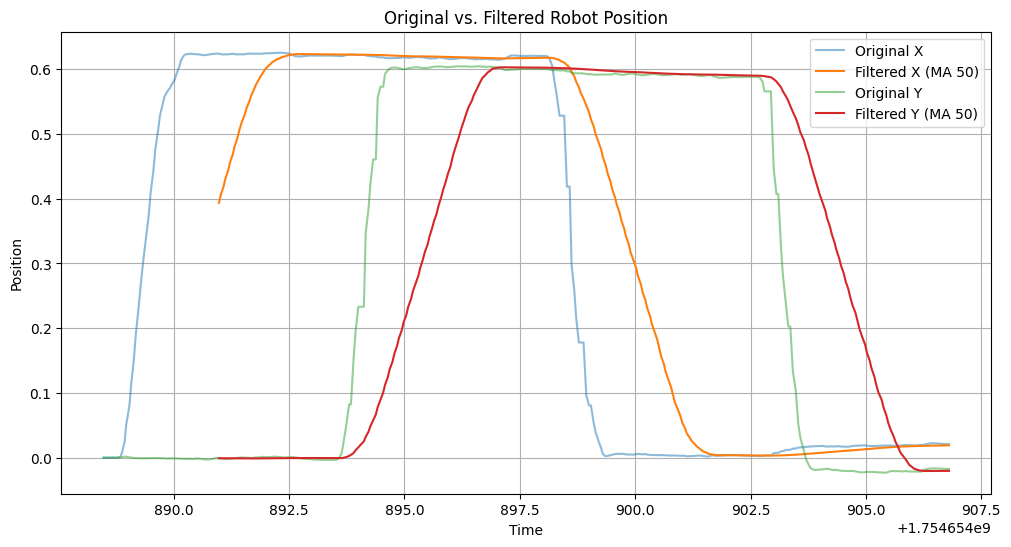

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('robot_log_19_08_08_P2-1_I0-3_D10_ramp0-7.csv')

# กำหนดขนาดของ window สำหรับ Moving Average Filter
window_size = 50

# ใช้ Moving Average Filter กับข้อมูลแกน x และ y
df['x_filtered'] = df['x'].rolling(window=window_size).mean()
df['y_filtered'] = df['y'].rolling(window=window_size).mean()

# พล็อตกราฟเพื่อเปรียบเทียบข้อมูลดิบกับข้อมูลที่ถูกฟิลเตอร์
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['x'], label='Original X', alpha=0.5)
plt.plot(df['time'], df['x_filtered'], label=f'Filtered X (MA {window_size})')
plt.plot(df['time'], df['y'], label='Original Y', alpha=0.5)
plt.plot(df['time'], df['y_filtered'], label=f'Filtered Y (MA {window_size})')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Original vs. Filtered Robot Position')
plt.legend()
plt.grid(True)
plt.show()

'''ทำไมถึงควรใช้ Moving Average Filter?

ลดสัญญาณรบกวน (Noise): ข้อมูลตำแหน่งแกน x และ y ของหุ่นยนต์มีความผันผวนเล็กน้อย ซึ่งเป็นสัญญาณรบกวนที่เกิดขึ้นตามธรรมชาติ Moving Average Filter จะช่วยทำให้เส้นกราฟของตำแหน่งที่หุ่นยนต์เคลื่อนที่เป็นไปอย่างราบรื่นมากขึ้น ทำให้เห็นแนวโน้มการเคลื่อนที่ที่แท้จริงได้ชัดเจน

ความเรียบง่ายและรวดเร็ว: ฟิลเตอร์นี้เป็นวิธีที่เข้าใจง่ายและใช้ทรัพยากรในการประมวลผลน้อยมาก เหมาะสำหรับงานที่ต้องการผลลัพธ์ที่รวดเร็วและไม่ซับซ้อน เช่น การควบคุมหุ่นยนต์แบบเรียลไทม์

ความเหมาะสมกับข้อมูล: จากการดูข้อมูลในไฟล์ CSV ที่เป็นชุดข้อมูลอนุกรมเวลา (time-series data) ที่มีการเปลี่ยนแปลงอย่างต่อเนื่อง Moving Average Filter จะช่วยเฉลี่ยค่าข้อมูลในช่วงเวลาที่กำหนด ทำให้ได้ค่าที่เสถียรมากขึ้น ซึ่งเหมาะสมกับข้อมูลประเภทนี้'''

